In [23]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [24]:
df = pd.read_csv('yield_df.csv')

In [25]:
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


In [26]:
df.shape

(28242, 8)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,14120.500000,8152.907488,0.00,7060.2500,14120.50,21180.75,28241.00
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [28]:
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [29]:
df.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [30]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [31]:
df["Area"].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [32]:
df["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [33]:
df["Item"].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

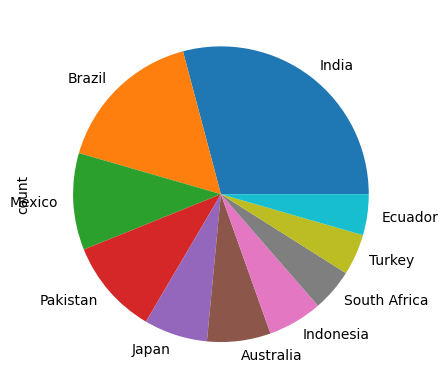

In [34]:
df['Area'].value_counts()[:10].plot(kind='pie')
plt.show()

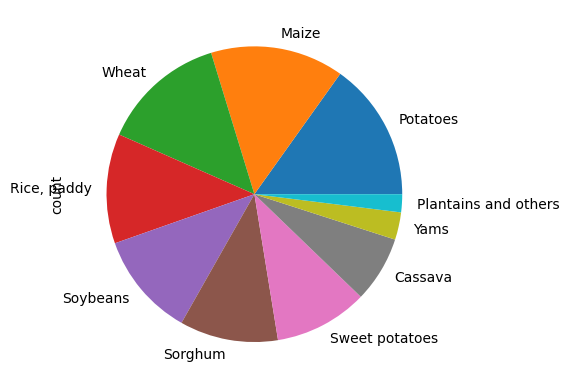

In [35]:
df['Item'].value_counts()[:10].plot(kind='pie')
plt.show()

In [36]:
df1 = df.drop(['Area', 'Year','Unnamed: 0'], axis=1)
df1.head()

,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Maize,36613,1485.0,121.0,16.37
1,Potatoes,66667,1485.0,121.0,16.37
2,"Rice, paddy",23333,1485.0,121.0,16.37
3,Sorghum,12500,1485.0,121.0,16.37
4,Soybeans,7000,1485.0,121.0,16.37


In [37]:
label_encoder = LabelEncoder()
df1['Item'] = label_encoder.fit_transform(df['Item'])

In [38]:
X = df1.drop('hg/ha_yield', axis=1)
y = df1['hg/ha_yield']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#rf_reg = BaggingRegressor(n_estimators=100, random_state=42)
#rf_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = rf_reg.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

accuracy = 1 - mse / y_test.var()
print(f'Accuracy: {accuracy}')

Mean Squared Error: 206997154.4023185
R-squared: 0.9714631216804769
Accuracy: 0.9714681733495013


In [43]:
sample_crop = 'Wheat'  
sample_avg_rainfall = 1485   
sample_pesticides_tonnes = 121  
sample_avg_temp = 16.37       

encoded_crop = label_encoder.transform([sample_crop])[0]

predicted_yield = rf_reg.predict([[encoded_crop, sample_avg_rainfall, sample_pesticides_tonnes, sample_avg_temp]])
print("Predicted Yield: ", predicted_yield[0])

Predicted Yield:  29637.95


C:\Users\Anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
#ADD MORE EXAMPLES TO TEST
#sample_crop = 'Wheat'  
#sample_avg_rainfall = 1485   
#sample_pesticides_tonnes = 121  
#sample_avg_temp = 16.37       

#encoded_crop = label_encoder.transform([sample_crop])[0]

#predicted_yield = rf_reg.predict([[encoded_crop, sample_avg_rainfall, sample_pesticides_tonnes, sample_avg_temp]])
#print("Predicted Yield: ", predicted_yield[0])


In [ ]:
pickle.dump(rf_classifier, open('YieldFinder.pkl','wb'))pickle.dump(rf_classifier, open('YieldFinder.pkl','wb'))